<a href="https://colab.research.google.com/github/Deiveegan3909/Admin_dashboard/blob/main/Finance_Flash_Currency_Analysis_Deiveegan_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
# Data Collection
start_date = '2023-01-01'
end_date = '2023-11-02'
eurinr_data = yf.download('EURINR=X', start=start_date, end=end_date)
eurinr_data.to_csv('eurinr_data.csv')

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Technical Analysis
ma_window = 20
eurinr_data['MA'] = eurinr_data['Close'].rolling(window=ma_window).mean()

bb_window = 20
bb_std = 2
eurinr_data['BB_upper'] = eurinr_data['Close'].rolling(window=bb_window).mean() + bb_std * eurinr_data['Close'].rolling(window=bb_window).std()
eurinr_data['BB_lower'] = eurinr_data['Close'].rolling(window=bb_window).mean() - bb_std * eurinr_data['Close'].rolling(window=bb_window).std()

cci_window = 20
typical_price = (eurinr_data['High'] + eurinr_data['Low'] + eurinr_data['Close']) / 3
mean_price = typical_price.rolling(window=cci_window).mean()
mean_deviation = abs(typical_price - mean_price).rolling(window=cci_window).mean()
cci = (typical_price - mean_price) / (0.015 * mean_deviation)
eurinr_data['CCI'] = cci

In [6]:
# Decision Making
# Assuming one day = 1 trading day and one week = 5 trading days
# Define a function to make decisions based on technical indicators for one day
def make_one_day_decision(row):
    if row['Close'] > row['MA'] and row['Close'] > row['BB_upper'] and row['CCI'] > 0:
        return 'BUY'
    elif row['Close'] < row['MA'] and row['Close'] < row['BB_lower'] and row['CCI'] < 0:
        return 'SELL'
    else:
        return 'NEUTRAL'

# Apply the one-day decision function to your DataFrame
eurinr_data['OneDayDecision'] = eurinr_data.apply(make_one_day_decision, axis=1)

In [7]:
# Define a function to make decisions based on technical indicators for one week
def make_one_week_decision(row):
    # Customize the criteria for one week decisions here
    if row['Close'] > row['MA']:
        return 'BUY'
    elif row['Close'] < row['MA']:
        return 'SELL'
    else:
        return 'NEUTRAL'

# Apply the one-week decision function to your DataFrame
eurinr_data['OneWeekDecision'] = eurinr_data.apply(make_one_week_decision, axis=1)

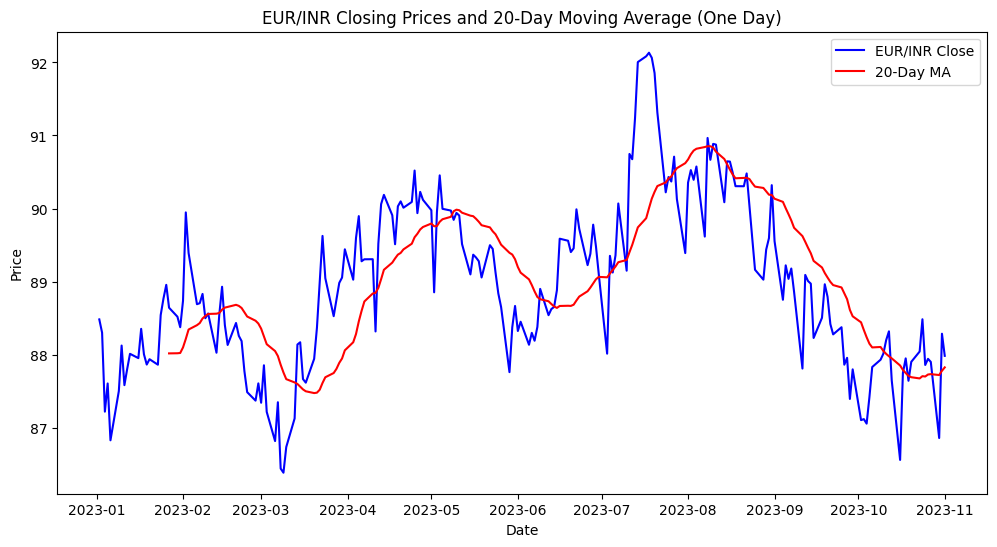

In [8]:
# Step 4: Create Visualizations
# Plot the Closing Prices and Moving Average for one day
plt.figure(figsize=(12, 6))
plt.plot(eurinr_data.index, eurinr_data['Close'], label='EUR/INR Close', color='blue')
plt.plot(eurinr_data.index, eurinr_data['MA'], label='20-Day MA', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EUR/INR Closing Prices and 20-Day Moving Average (One Day)')
plt.legend()
plt.show()

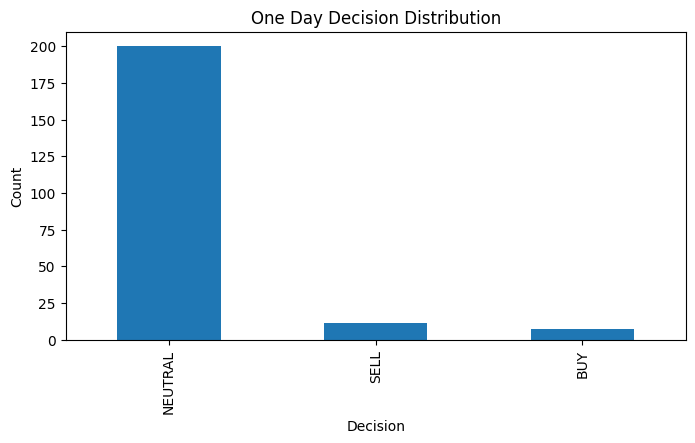

In [9]:
# Plot a bar chart for one-day decisions
decision_counts = eurinr_data['OneDayDecision'].value_counts()
plt.figure(figsize=(8, 4))
decision_counts.plot(kind='bar')
plt.title('One Day Decision Distribution')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

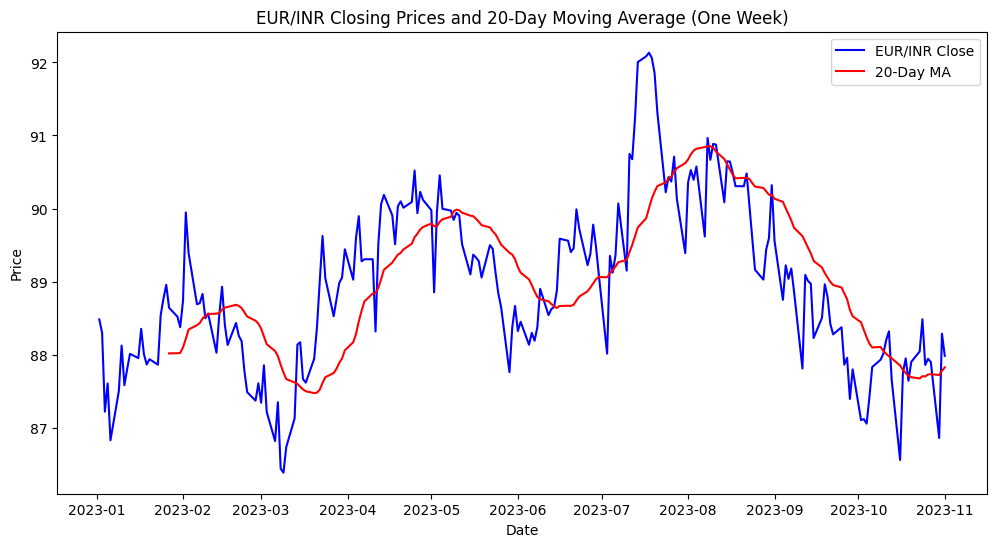

In [10]:
# Plot the Closing Prices and Moving Average for one week
plt.figure(figsize=(12, 6))
plt.plot(eurinr_data.index, eurinr_data['Close'], label='EUR/INR Close', color='blue')
plt.plot(eurinr_data.index, eurinr_data['MA'], label='20-Day MA', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EUR/INR Closing Prices and 20-Day Moving Average (One Week)')
plt.legend()
plt.show()

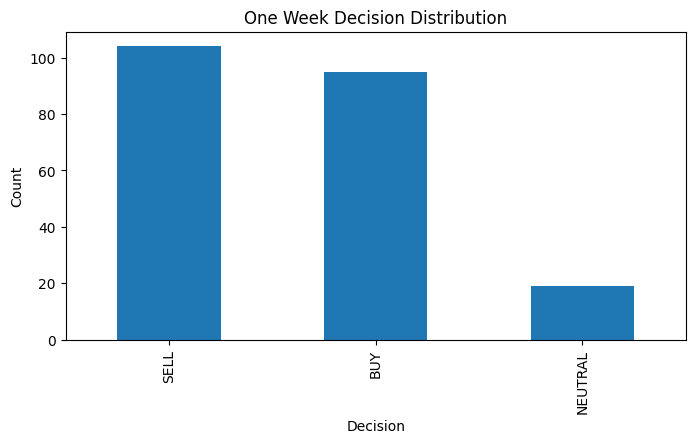

In [11]:
# Plot a bar chart for one-week decisions
week_decision_counts = eurinr_data['OneWeekDecision'].value_counts()
plt.figure(figsize=(8, 4))
week_decision_counts.plot(kind='bar')
plt.title('One Week Decision Distribution')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

In [12]:
# Step 5: Save the Data
# Save the updated DataFrame to a CSV file
eurinr_data.to_csv('eurinr_data_with_decisions.csv')